# Многослойная нейронная сеть

Задача обучения "девочки" выбора парня по трём критериям

In [1]:
%%capture
%pip install tensorflow

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD

In [3]:
# Создаем обучающую выборку: 4 примера с тремя входными признаками и метками
# Входные данные: [квартира, красота, любовь к тяжелому року]
x_train = np.array([
    [+1, +1, +1],   # Парень имеет квартиру, красивый, не любит тяжелый рок
    [+1, -1, +1],  # Парень имеет квартиру, некрасивый, не любит тяжелый рок
    [-1, +1, -1], # Парень не имеет квартиры, красивый, любит тяжелый рок
    [-1, -1, -1] # Парень не имеет квартиры, некрасивый, любит тяжелый рок
])

In [4]:
# Метки: 1 - подходит, 0 - не подходит
y_train = np.array([1, 1, 0, 0])

In [5]:
# Создаем модель
# model = Sequential()
# model.add(Input(shape=(3,)))                         # Входной слой с 3 нейронами
# model.add(Dense(2, activation='relu'))               # Первый слой с 2 нейронами и активацией ReLU
# model.add(Dense(1, activation='sigmoid'))            # Выходной слой с 1 нейроном и сигмоидной активацией

model = Sequential([Input((3,)), Dense(2, 'relu'), Dense(1, 'sigmoid')])

2024-12-03 17:15:37.887628: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
# Компилируем модель
model.compile(SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Обучаем модель и записываем историю
history = model.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.5859
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step - accuracy: 1.0000 - loss: 0.5696
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.5543
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.5399
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.5263
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.5134
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 1.0000 - loss: 0.5012
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.4896
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.4785
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 0.4680
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.4579
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.4482
Ep

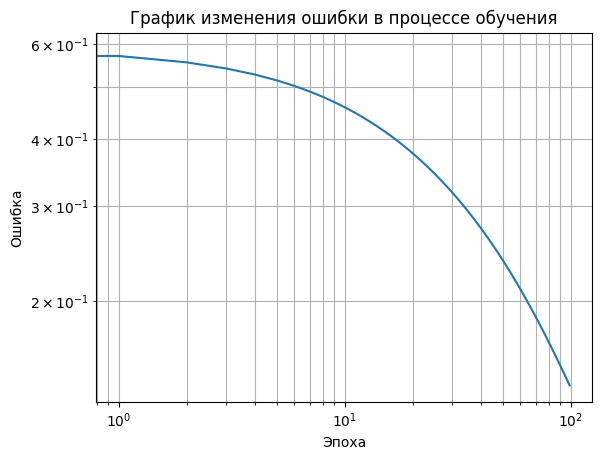

In [8]:
# График изменения ошибки (потерь) в процессе обучения
plt.plot(history.history['loss'])
plt.title('График изменения ошибки в процессе обучения')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both')
plt.show()

In [9]:
# Проверим работу обученной модели
predictions = (model.predict(x_train, verbose=0) > 0.5).astype(int)
print("Предсказания (1 - подходит, 0 - не подходит):")
print(predictions)

Предсказания (1 - подходит, 0 - не подходит):
[[1]
 [1]
 [0]
 [0]]


In [10]:
# Посмотрим веса и смещения для каждого слоя
for i, layer in enumerate(model.layers):
    W, O = layer.get_weights()  # Получаем веса и смещения для слоя
    print(f"Слой {i + 1} — Веса:\n{W}")
    print(f"Слой {i + 1} — Смещения:\n{O}\n")

Слой 1 — Веса:
[[-0.71667725 -0.86011547]
 [ 0.10992455  0.0403201 ]
 [-0.09145953 -1.1220305 ]]
Слой 1 — Смещения:
[-0.01902067  0.660972  ]

Слой 2 — Веса:
[[-0.15237477]
 [-1.7978026 ]]
Слой 2 — Смещения:
[1.255829]



In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [12]:
model.save('girl_model.h5')
model.save('girl_model.keras')

In [16]:
model2 = load_model('girl_model.h5')
model3 = load_model('girl_model.keras')

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
